In [5]:
pip install qiskit



SyntaxError: invalid syntax (736486420.py, line 1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# importing Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

ModuleNotFoundError: No module named 'qiskit'

In [ ]:
n = 4
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)

if oracleType == 0:
    print("The oracle returns a constant value ", oracleValue)
else:
    print("The oracle returns a balanced function")
    a = np.random.randint(1,2**n) # this is a hidden parameter for balanced oracle. 

# Creating registers
# n qubits for querying the oracle and one qubit for storing the answer
qr = QuantumRegister(n+1) #all qubits are initialized to zero
# for recording the measurement on the first register
cr = ClassicalRegister(n, name='res')

circuitName = "DeutschJozsa"
djCircuit = QuantumCircuit(qr, cr)

# Create the superposition of all input queries in the first register by applying the Hadamard gate to each qubit.
for i in range(n):
    djCircuit.h(qr[i])

# Flip the second register and apply the Hadamard gate.
djCircuit.x(qr[n])
djCircuit.h(qr[n])
    
# Apply barrier to mark the beginning of the oracle
djCircuit.barrier()

if oracleType == 0:#If the oracleType is "0", the oracle returns oracleValue for all input. 
    if oracleValue == 1:
        djCircuit.x(qr[n])
    else:
        djCircuit.id(qr[n])
else: # Otherwise, it returns the inner product of the input with a (non-zero bitstring) 
    for i in range(n):
        if (a & (1 << i)):
            djCircuit.cx(qr[i], qr[n])
        
# Apply barrier to mark the end of the oracle
djCircuit.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(n):
    djCircuit.h(qr[i])
    
# Measurement
djCircuit.barrier()
for i in range(n):
    djCircuit.measure(qr[i], cr[i])

The oracle returns a balanced function


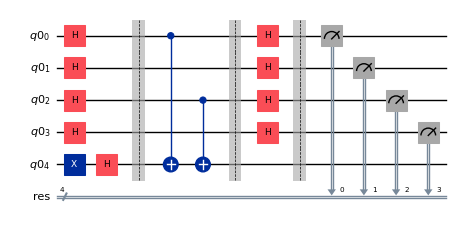

In [ ]:
djCircuit.draw(output='mpl',scale=0.5)

In [ ]:
import numpy as np

# Mocking the 16x16 grid with "e" and "f" (1 for "e" and 0 for "f")
# Example for testing: Replace with actual image processing if needed
grid = np.random.choice(['e', 'f'], (16, 16))

# Initialize a 14x14 output for each 2x2 segment
result_grid = np.empty((14, 14), dtype=str)

for i in range(14):
    for j in range(14):
        # Extract 2x2 subgrid
        subgrid = grid[i:i+2, j:j+2]
        # Determine if it's "balanced" (edge) or "constant" (fill)
        unique_values = np.unique(subgrid)
        if len(unique_values) > 1:
            result_grid[i, j] = 'e'  # "edge" (balanced)
        else:
            result_grid[i, j] = 'f'  # "fill" (constant)

print("Resulting 14x14 Grid:")
print(result_grid)


Resulting 14x14 Grid:
[['e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e']
 ['e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'f' 'e' 'f' 'e']
 ['e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e']
 ['f' 'e' 'f' 'e' 'e' 'e' 'e' 'f' 'e' 'e' 'e' 'e' 'e' 'e']
 ['e' 'e' 'e' 'e' 'e' 'e' 'e' 'f' 'e' 'e' 'e' 'e' 'e' 'e']
 ['e' 'e' 'e' 'e' 'f' 'e' 'f' 'f' 'e' 'e' 'e' 'e' 'e' 'e']
 ['e' 'e' 'e' 'e' 'f' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e']
 ['e' 'e' 'e' 'e' 'f' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e']
 ['e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e']
 ['e' 'e' 'e' 'e' 'e' 'f' 'f' 'e' 'e' 'e' 'e' 'e' 'e' 'e']
 ['e' 'e' 'f' 'e' 'e' 'f' 'f' 'e' 'e' 'e' 'e' 'f' 'f' 'f']
 ['e' 'e' 'f' 'e' 'e' 'e' 'e' 'f' 'e' 'e' 'e' 'e' 'e' 'e']
 ['e' 'f' 'f' 'f' 'e' 'f' 'e' 'e' 'e' 'e' 'e' 'f' 'e' 'e']
 ['e' 'f' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'f' 'e' 'f' 'f' 'e']]


In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, BasicAer

def run_dj_circuit(oracle_type, oracle_value, n):
    # Define a circuit similar to your existing code
    qr = QuantumRegister(n+1)
    cr = ClassicalRegister(n, name='res')
    djCircuit = QuantumCircuit(qr, cr)

    # Initial superposition
    for i in range(n):
        djCircuit.h(qr[i])
    
    # Flip the second register and apply Hadamard gate
    djCircuit.x(qr[n])
    djCircuit.h(qr[n])

    # Oracle section (simplified as per oracle_type and oracle_value)
    djCircuit.barrier()
    if oracle_type == 0:  # Constant function
        if oracle_value == 1:
            djCircuit.x(qr[n])
    else:  # Balanced function (example case)
        for i in range(n):
            if (oracle_value & (1 << i)):  # Custom oracle for this 2x2 subgrid
                djCircuit.cx(qr[i], qr[n])
    djCircuit.barrier()

    # Apply Hadamard gates and measure
    for i in range(n):
        djCircuit.h(qr[i])
    
    djCircuit.barrier()
    for i in range(n):
        djCircuit.measure(qr[i], cr[i])

    # Run the circuit
    simulator = BasicAer.get_backend('qasm_simulator')
    job = execute(djCircuit, simulator, shots=1024)
    result = job.result()
    counts = result.get_counts(djCircuit)
    
    # Determine if constant or balanced based on measurement
    return "balanced" if '0' * n in counts else "constant"

# Initialize the output 14x14 grid
output_grid = np.empty((14, 14), dtype=str)

# Process each 2x2 subgrid
for i in range(14):
    for j in range(14):
        # Randomly assign oracle type and value for each 2x2 subgrid as per your logic
        oracle_type, oracle_value = np.random.randint(2), np.random.randint(2)

        # Run the circuit
        result = run_dj_circuit(oracle_type, oracle_value, 4)
        
        # Map result to 'e' for edge and 'f' for fill in the output grid
        output_grid[i, j] = 'e' if result == "balanced" else 'f'

print("Final 14x14 Output Grid:")
print(output_grid)

ImportError: cannot import name 'execute' from 'qiskit' (c:\Users\chris\anaconda3\envs\qc\Lib\site-packages\qiskit\__init__.py)

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

In [ ]:
from qiskit_aer import Aer

ModuleNotFoundError: No module named 'qiskit_aer'